# Sujet 1: Concentration de CO2 dans l'atmosphère depuis 1952

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
#import isomonth
import requests
import os
import urllib.request
data_file = "weekly_in_situ_co2_mlo.csv"
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
raw_data_prov = pd.read_csv('./monthly_in_situ_co2_mlo.csv',skiprows=54)
raw_data_prov

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.70      314.43       316.19   
5    1958   04     21290   1958.2877     317.45      315.16       317.30   
6    1958   05     21320   1958.3699     317.51      314.71       317.86   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.24   
8    1958   07     21381   1958.5370     315.86      315.19       315.86   
9    1958   08     21412   1958.6219     314.93      316.19       313.99   
10   1958   09     21443   1958.7068     313.21      316.09       312.45   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.43   
12   1958   11     21504   1958.8740     313.33      315.20       313.61   
13   1958   12     21534   1958.9562     314.67      315.43       314.77   
14   1959   01     21565   1959.0411     315.58      315.54       315.62   
15   1959   02     21596   1959.1260     316.49      315.86       316.27   
16   1959   03     21624   1959.2027     316.65      315.38       316.98   
17   1959   04     21655   1959.2877     317.72      315.41       318.09   
18   1959   05     21685   1959.3699     318.29      315.48       318.66   
19   1959   06     21716   1959.4548     318.15      316.03       318.04   
20   1959   07     21746   1959.5370     316.54      315.87       316.67   
21   1959   08     21777   1959.6219     314.80      316.07       314.82   
22   1959   09     21808   1959.7068     313.84      316.73       313.31   
23   1959   10     21838   1959.7890     313.33      316.33       313.32   
24   1959   11     21869   1959.8740     314.81      316.68       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.73   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.35       317.27   
28   1960   03     21990   1960.2049     317.58      316.28       318.03   
29   1960   04     22021   1960.2896     319.03      316.70       319.15   
..    ...  ...       ...         ...        ...         ...          ...   
728  2018   07     43296   2018.5370     408.90      408.09       409.42   
729  2018   08     43327   2018.6219     407.10      408.63       407.34   
730  2018   09     43358   2018.7068     405.59      409.08       405.67   
731  2018   10     43388   2018.7890     405.99      409.61       405.85   
732  2018   11     43419   2018.8740     408.12      410.38       407.49   
733  2018   12     43449   2018.9562     409.23      410.15       409.08   
734  2019   01     43480   2019.0411     410.92      410.87       410.31   
735  2019   02     43511   2019.1260     411.66      410.90       411.26   
736  2019   03     43539   2019.2027     412.00      410.46       412.25   
737  2019   04     43570   2019.2877     413.52      410.73       413.73   
738  2019   05     43600   2019.3699     414.83      411.43       414.54   
739  2019   06     43631   2019.4548     413.96      411.39       413.91   
740  2019   07     43661   2019.5370     411.85      411.04       412.34   
741  2019   08     43692   2019.6219     410.08      411.62       410.21   
742  2019   09     43723   2019.7068     408.55      412.05       408.49   
743  2019   10     43753   2019.7890     408.43      412.06       408.61   
744  2019   11     43784   2019.8740     410.29      412.55       410.20   
745  2019   12     43814   2019.9562     411.85      412.78       411.74   
746  2020   01     43845   2020.0410     413.37      413.32       412.92   
747  2020   02     43876   2020.1257     414.09      413.33       413.84   
748  2020   03     43905   2020.2049     414.51      41

The raw data are rather a mess. The name are not good and are not several lines (with the unity). Hence, the data are stored in a dictionnary with proper keys. Moreover, the date with several format is in the raw data. Only the year and the month is stored. 

Moreover, the data are string and then they are translated as float

In [3]:

raw_data = pd.DataFrame({"Year":raw_data_prov['  Yr'][2:].astype(int), "Month":raw_data_prov[' Mn'][2:].astype(int), 
                         "CO2 seasonally":raw_data_prov['     CO2'][2:].astype(float), "CO2 seasonally adjust":raw_data_prov['seasonally'][2:].astype(float),
                         "seasonally fit":raw_data_prov['        fit'][2:].astype(float),"seasonally adjusted fit":raw_data_prov['  seasonally'][2:].astype(float), 
                         "CO2 seasonally filled":raw_data_prov['      CO2'][2:].astype(float), "CO2 seasonally adjust filled":raw_data_prov[' seasonally'][2:].astype(float)})
#raw_data = raw_data.drop([0,1])
raw_data

CO2 seasonally  CO2 seasonally adjust  CO2 seasonally adjust filled  \
2            -99.99                 -99.99                        -99.99   
3            -99.99                 -99.99                        -99.99   
4            315.70                 314.43                        314.43   
5            317.45                 315.16                        315.16   
6            317.51                 314.71                        314.71   
7            -99.99                 -99.99                        315.14   
8            315.86                 315.19                        315.19   
9            314.93                 316.19                        316.19   
10           313.21                 316.09                        316.09   
11           -99.99                 -99.99                        315.41   
12           313.33                 315.20                        315.20   
13           314.67                 315.43                        315.43   
14           315.58                 315.54                        315.54   
15           316.49                 315.86                        315.86   
16           316.65                 315.38                        315.38   
17           317.72                 315.41                        315.41   
18           318.29                 315.48                        315.48   
19           318.15                 316.03                        316.03   
20           316.54                 315.87                        315.87   
21           314.80                 316.07                        316.07   
22           313.84                 316.73                        316.73   
23           313.33                 316.33                        316.33   
24           314.81                 316.68                        316.68   
25           315.58                 316.35                        316.35   
26           316.43                 316.39                        316.39   
27           316.98                 316.35                        316.35   
28           317.58                 316.28                        316.28   
29           319.03                 316.70                        316.70   
30           320.04                 317.21                        317.21   
31           319.58                 317.47                        317.47   
..              ...                    ...                           ...   
728          408.90                 408.09                        408.09   
729          407.10                 408.63                        408.63   
730          405.59                 409.08                        409.08   
731          405.99                 409.61                        409.61   
732          408.12                 410.38                        410.38   
733          409.23                 410.15                        410.15   
734          410.92                 410.87                        410.87   
735          411.66                 410.90                        410.90   
736          412.00                 410.46                        410.46   
737          413.52                 410.73                        410.73   
738          414.83                 411.43                        411.43   
739          413.96                 411.39                        411.39   
740          411.85                 411.04                        411.04   
741          410.08                 411.62                        411.62   
742          408.55                 412.05                        412.05   
743          408.43                 412.06                        412.06   
744          410.29                 412.55                        412.55   
745          411.85                 412.78                        412.78   
746          413.37                 413.32                        413.32   
747          414.09                 413.33                        413.33   
748          414.51                 412.94           

According to the authors:

"CO2 seasonally" gives monthly Mauna Loa CO2 concentrations in micro-mol CO2 per mole (ppm), reported on the 2008A SIO manometric mole fraction scale.The monthly values have been adjusted to 24:00 hours on the 15th of each month.

"CO2 seasonally adjust" gives the same data after a seasonal adjustment to remove the quasi-regular seasonal cycle.  The adjustment involves subtracting from the data a 4-harmonic fit with a linear gain factor.

"seasonally fit" is a smoothed version of the data generated from a stiff cubic spline function plus 4-harmonic functions with linear gain.

"seasonally adjusted fit" is the same smoothed version with the seasonal cycle removed.  

"CO2 seasonally adjust filled" and "CO2 seasonally filled" are identical to Columns "CO2 seasonally" and "CO2 seasonally adjust" except that the missing values from have been filled with values from Columns "fit" and "seasonally adjusted fit"

Moreover, it is said that the missing data are completed with the value -99.99

The month and year can be then converted to panda Period.

Let us then check that eventhought some data are missing, every month are present in the data. Then we store the number of month since the beginning of the measurements. 

In [4]:
raw_data['period'] = [pd.Period(str(y)+'-'+str(m)+'-15') for y,m in zip(raw_data['Year'],raw_data['Month'])]
sorted_data = raw_data.set_index('period').sort_index()
for y1,m1,y2,m2 in zip(sorted_data['Year'][:-1],sorted_data['Month'][:-1],sorted_data['Year'][1:],sorted_data['Month'][1:]):
    if np.abs(m1-m2)>1: 
        # if the consecutive month are bigger than 1, either we change of year, either some data are missing
        if np.abs(y1-y2)>1:
            print("problem with the dates ",str(y1)+'-'+str(m1)+'-15'," and ",str(y2)+'-'+str(m2)+'-15')
sorted_data["nb of month from the beginning"] = np.arange(0,np.size(sorted_data['Month']))

In order to highlight the seasonal and interannual variations, only the raw concentrations stored in 'CO2 seasonally" and "CO2 seasonally adjust" are enough. The first one is the raw concentrations and contains both the seasonal and interannual variations. The second one is a adjustement made in order to get rid of the seasonal variations.

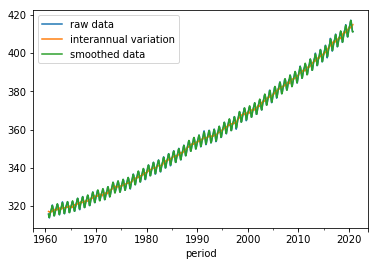

In [12]:
nb_year = 60
sorted_data=sorted_data[~(sorted_data["CO2 seasonally"] < 0)]
sorted_data["CO2 seasonally"][-12*nb_year:].plot(label='raw data')
sorted_data["CO2 seasonally adjust"][-12*nb_year:].plot(label='interannual variation')
sorted_data=sorted_data[~(sorted_data["seasonally fit"] < 0)]
sorted_data["seasonally fit"][-12*nb_year:].plot(label='smoothed data')
plt.legend()
#sorted_data = data.set_index('period').sort_index()

We store the difference between the monthly CO2 concentration and the interannual variations of this concentration (obtained by the adjustement). Hence, it represent the seasonnal variations of the concentration 

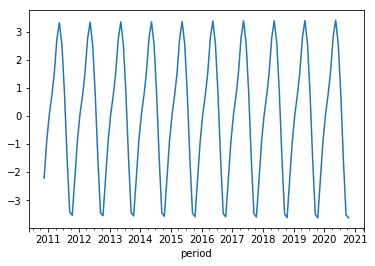

In [7]:
sorted_data["CO2 seasonal variations"] = sorted_data["CO2 seasonally"] - sorted_data["CO2 seasonally adjust"]
sorted_data["CO2 seasonal variations"][-12*nb_year:].plot()

This seasonal variations are rather close to a cosinus function with a one year period. In the other hand, the interannual variations are nearly linear. 

Hence, a linear regression is going to be performed in order to get the slope and the intercept

cost of the linear approximation of the interannual variations:  5660.432501216549
normalized cost of the linear approximation of the interannual variations:  7.5775535491520065


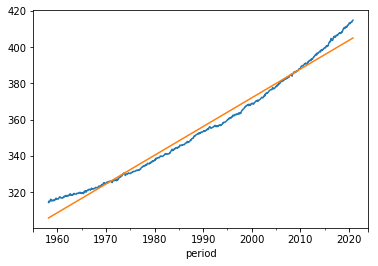

In [38]:
from scipy.optimize import lsq_linear
A = np.ones((np.size(sorted_data["nb of month from the beginning"]),2));A[:,0]=sorted_data["nb of month from the beginning"]
b = sorted_data["CO2 seasonally adjust"]
res_lin = lsq_linear(A, b)
slope,intercept = res_lin.x
print("cost of the linear approximation of the interannual variations: ",res_lin.cost)
print("normalized cost of the linear approximation of the interannual variations: ",res_lin.cost/np.size(b))
sorted_data["CO2 interannual linear variations"] = slope * sorted_data["nb of month from the beginning"] + intercept
sorted_data["CO2 seasonally adjust"].plot(label='interannual var')
sorted_data["CO2 interannual linear variations"].plot(label='interannual var lin approx')

It actually seems that the interannual variations are more like a second order polynomial function

cost of the quadratic approximation of the interannual variations:  204.80913681144062
normalized cost of the quadratic approximation of the interannual variations:  0.2741755512870691


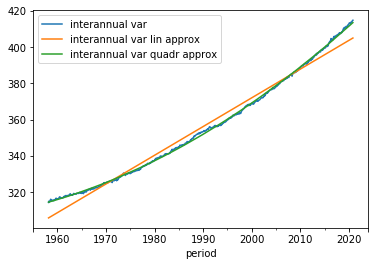

In [39]:
A = np.ones((np.size(sorted_data["nb of month from the beginning"]),3));A[:,0]=sorted_data["nb of month from the beginning"]**2;A[:,1]=sorted_data["nb of month from the beginning"]
b = sorted_data["CO2 seasonally adjust"]
res_quad = lsq_linear(A, b)
sq_coef,slope,intercept = res_quad.x
print("cost of the quadratic approximation of the interannual variations: ",res_quad.cost)
print("normalized cost of the quadratic approximation of the interannual variations: ",res_quad.cost/np.size(b))
sorted_data["CO2 interannual quadr variations"] = sq_coef * sorted_data["nb of month from the beginning"]**2 + slope * sorted_data["nb of month from the beginning"] + intercept
sorted_data["CO2 seasonally adjust"].plot(label='interannual var')
sorted_data["CO2 interannual linear variations"].plot(label='interannual var lin approx')
sorted_data["CO2 interannual quadr variations"].plot(label='interannual var quadr approx')
plt.legend()

Hence, one can try to estimate the concentration of CO2 by extrapolating using this quadratic function. Here we extrapolate until 2025. In a first time, we store a new data frame with the extended time period.

In [40]:
print("the first measurements was the ", raw_data['period'][2])
year_0 = raw_data['Year'][2]; year_f = 2026; nb_month_tot = (year_f-year_0)*12

y = year_0; m = 1
year = year_0 * np.ones(nb_month_tot); month = np.ones(nb_month_tot)
for current_month in np.arange(1,nb_month_tot): 
    if month[current_month-1]<12:
        month[current_month] = month[current_month-1] + 1
        year[current_month] = year[current_month-1]
    else : 
        year[current_month] = year[current_month-1] + 1

extrapol_data = pd.DataFrame({"nb of month from the beginning":np.arange(0,nb_month_tot),
                              'Year':year,
                              'Month':month,
                              'period':[pd.Period(str(int(y))+'-'+str(int(m))+'-15') for y,m in zip(year,month)] })    
print('The first and last date considered are ',extrapol_data['period'][0],' and ',extrapol_data['period'][nb_month_tot-1])

the first measurements was the  1958-01-15
The first and last date considered are  1958-01-15  and  2025-12-15


We know check that the period are consecutive

In [46]:
sorted_extrapol_data = extrapol_data.set_index('period').sort_index()
for y1,m1,y2,m2 in zip(sorted_extrapol_data['Year'][:-1],sorted_extrapol_data['Month'][:-1],sorted_extrapol_data['Year'][1:],sorted_extrapol_data['Month'][1:]):
    if np.abs(m1-m2)>1: 
        # if the consecutive month are bigger than 1, either we change of year, either some data are missing
        if np.abs(m1-m2)==11 and np.abs(y1-y2)>1:
            print("problem with the dates ",str(y1)+'-'+str(m1)+'-15'," and ",str(y2)+'-'+str(m2)+'-15') 

We can know extrapolate and plot the estimation

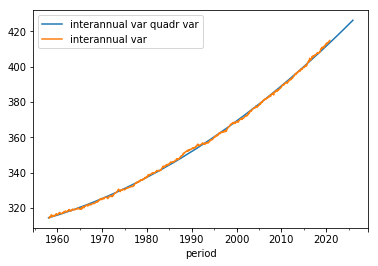

In [44]:
sq_coef,slope,intercept = res_quad.x
sorted_extrapol_data["CO2 interannual quadr est"] = sq_coef * sorted_extrapol_data["nb of month from the beginning"]**2 + slope * sorted_extrapol_data["nb of month from the beginning"] + intercept
sorted_extrapol_data["CO2 interannual quadr est"].plot(label='interannual var quadr var')
sorted_data["CO2 seasonally adjust"].plot(label='interannual var')
plt.legend()

This quadratic model seems to provide a convincing trend for the estimation of the CO0 concentration in the atmosphere in the newt year. 